<a href="https://colab.research.google.com/github/elhamsh93/object_detection/blob/main/Copy_of_retinanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
!nvidia-smi

Sun Apr 16 12:24:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |   3159MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [143]:
!pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
from torchvision import datasets, transforms
from torchvision.models.detection import retinanet_resnet50_fpn
import os 

In [145]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [146]:
model = retinanet_resnet50_fpn(True)
model.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


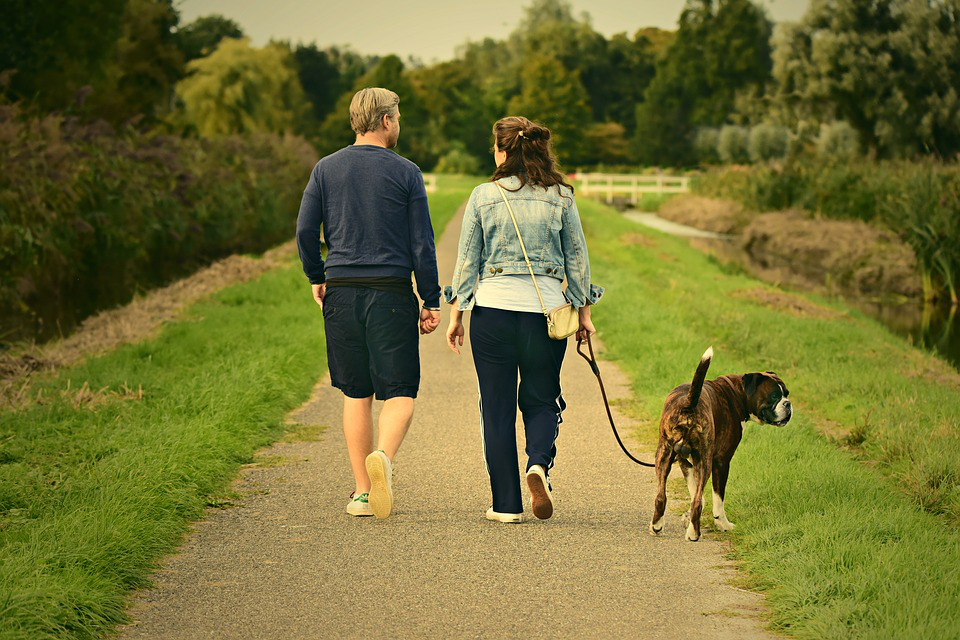

In [147]:
from PIL import Image
img_pil = Image.open('/content/test.jpg').convert('RGB')
display(img_pil)

In [148]:
img_tensor = torchvision.transforms.functional.to_tensor(img_pil)
list_img = [img_tensor.to(device)]

model.eval()
with torch.no_grad():
  predictions = model(list_img)
predictions

[{'boxes': tensor([[450.6274, 113.6343, 603.8358, 527.7573],
          [293.4168,  86.1515, 445.3184, 520.6006],
          [650.1875, 344.8228, 792.3867, 540.0524],
          [515.4357, 211.1566, 596.1097, 347.5118],
          [648.8920, 352.0550, 793.4495, 538.3178],
          [546.6240, 302.6244, 579.6660, 340.7246],
          [467.5963, 151.6513, 595.3365, 398.0926],
          [472.3569, 189.5478, 571.1249, 344.1200],
          [648.8920, 352.0550, 793.4495, 538.3178],
          [651.6296, 346.0913, 790.7809, 540.5784],
          [547.1218, 277.1522, 600.1688, 340.1089],
          [443.9546, 286.7651, 454.4555, 302.0245],
          [467.5963, 151.6513, 595.3365, 398.0926],
          [443.7299, 286.4459, 454.2474, 302.5361],
          [541.4437, 249.4051, 584.5117, 337.2350],
          [443.7299, 286.4459, 454.2474, 302.5361],
          [443.9546, 286.7651, 454.4555, 302.0245],
          [489.3780, 266.0490, 498.2204, 275.1756],
          [458.2622, 189.8376, 528.4587, 331.4801],
   

In [149]:
boxes = predictions[0]['boxes'].cpu()
labels = predictions[0]['labels'].cpu()
scores = predictions[0]['scores'].cpu()

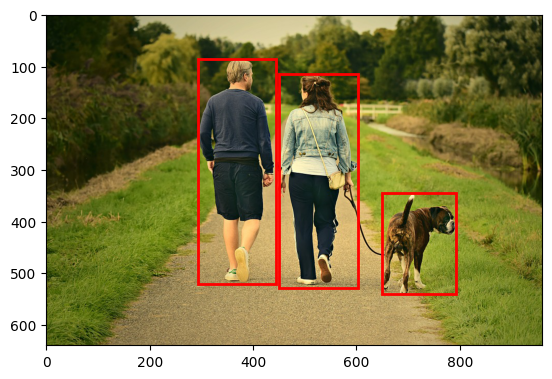

In [150]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

img = img_tensor.cpu().permute(1, 2, 0).numpy()
plt.imshow(img)

ax = plt.gca()
for box, label, score in zip(boxes.cpu(), labels.cpu(), scores.cpu()):
  if score > 0.6:
    rect = Rectangle((box[0], box[1]),
                     (box[2] - box[0]),
                     (box[3] - box[1]),
                     fill=False,
                     edgecolor=(1, 0, 0),
                     linewidth=2)
    ax.add_patch(rect)


plt.show()

In [151]:
!curl -L "https://public.roboflow.com/ds/T3sDKnivyK?key=OIACPuMd1B" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   884  100   884    0     0   1800      0 --:--:-- --:--:-- --:--:--  1800
100 38.9M  100 38.9M    0     0  9530k      0  0:00:04  0:00:04 --:--:-- 11.6M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.dataset.txt      
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.roboflow.txt     
replace test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
replace test/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: test/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  

In [152]:
import albumentations as A
import random
import copy

import cv2
from matplotlib import pyplot as plt

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)


def visualize_augmentations(dataset, idx=0, samples=10, cols=5):
  dataset = copy.deepcopy(dataset)
  rows = samples // cols
  figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
  for i in range(samples):
    image, _= dataset[idx]
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_axis_off()
  plt.tight_layout()
  plt.show()



In [153]:
annFileTrain = '/content/train/_annotations.coco.json'
annFileTest = '/content/test/_annotations.coco.json'

In [154]:
from pycocotools.coco import COCO

cars = COCO(annFileTrain)
cars

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [162]:
import os.path
from typing import Any, Callable, List, Optional, Tuple

from PIL import Image
import numpy

from torchvision.datasets.vision import VisionDataset
import torchvision.transforms.functional as F

class CarDataset(VisionDataset):
    """`MS Coco Detection <https://cocodataset.org/#detection-2016>`_ Dataset.

    It requires the `COCO API to be installed <https://github.com/pdollar/coco/tree/master/PythonAPI>`_.

    Args:
        root (string): Root directory where images are downloaded to.
        annFile (string): Path to json annotation file.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.PILToTensor``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        transforms (callable, optional): A function/transform that takes input sample and its target as entry
            and returns a transformed version.
    """

    def __init__(
        self,
        root: str,
        annFile: str,
        transforms: Optional[Callable] = None,
    ) -> None:
        super().__init__(root, transforms)

        self.annFile = annFile
        from pycocotools.coco import COCO

        self.coco = COCO(annFile)
        self.ids = list(sorted(self.coco.imgs.keys()))

    def _load_image(self, id: int) -> Image.Image:
        path = self.coco.loadImgs(id)[0]["file_name"]
        return Image.open(os.path.join(self.root, path)).convert("RGB")

    def _load_target(self, id: int) -> List[Any]:
        return self.coco.loadAnns(self.coco.getAnnIds(id))

    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)

        targets = {}
        targets['boxes'] = torch.tensor([item['bbox'] for item in target])
        targets['labels'] = torch.tensor([item['category_id'] for item in target])

        if self.transforms is not None:
            np_image = F.to_tensor(image).permute(1, 2, 0).numpy()

            transformed = self.transforms(image=np_image,
                                    bboxes=targets['boxes'],
                                    category_ids=  targets['labels'])
      
            image = torch.tensor(transformed['image']).permute(2, 0, 1)
            targets['boxes'] = torch.tensor(transformed['bboxes'])
            if targets['boxes'].numel() > 0:
              targets['area'] = targets['boxes'][:, 2] * targets['boxes'][:, 3] 
              targets['boxes'][:, 2] += targets['boxes'][:, 0]
              targets['boxes'][:, 3] += targets['boxes'][:, 1]
              targets['labels'] = torch.tensor(transformed['category_ids'])
              targets["image_id"] = torch.tensor(target[0]['image_id'])
              targets['iscrowd'] = torch.tensor([item['iscrowd'] for item in target])
            else:
              targets = {}
            
        return image, targets


    def __len__(self) -> int:
        return len(self.ids)


In [163]:
def new_concat(batch):
  return tuple(zip(*batch))

def get_loader(root, annFile, transforms, batch_size=1, shuffle= False, num_workers=2):
    """Returns torch.utils.data.DataLoader for custom coco dataset."""
    # COCO caption dataset
    car_dataset = CarDataset(root=root,
                       annFile=annFile,
                       transforms=transforms)
    
    # Data loader for COCO dataset
    # This will return (images, captions, lengths) for each iteration.
    # images: a tensor of shape (batch_size, 3, 224, 224).
    # captions: a tensor of shape (batch_size, padded_length).
    # lengths: a list indicating valid length for each caption. length is (batch_size).
    data_loader = torch.utils.data.DataLoader(dataset=car_dataset, 
                                              batch_size=batch_size,
                                              shuffle=shuffle,
                                              num_workers=num_workers,
                                              collate_fn=new_concat)
    return data_loader, car_dataset

**Dataset**

In [164]:
train_transforms = A.Compose([A.HorizontalFlip(p=0.8),
                        A.ShiftScaleRotate(p=0.9),
                        A.RandomBrightness(p=0.8)],
                       bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

test_transforms = A.Compose([A.Resize(416, 416)],
                       bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))

In [165]:
train_loader, train_set = get_loader('train', annFileTrain, shuffle=True, transforms=train_transforms)
test_loader, test_set = get_loader('test', annFileTest, shuffle=True, transforms=test_transforms)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [166]:
batch = next(iter(train_loader))

In [167]:
batch[0][0].size(), type(batch[1][0])

(torch.Size([3, 416, 416]), dict)

In [168]:
def move_to_device(inputs, outputs):
  images = [image.to(device) for image in inputs] 
  targets = [{k: v.to(device) for k, v in t.items()} for t in outputs]
  return images, targets

**Model**

In [42]:
net = retinanet_resnet50_fpn(True).to(device)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


**Config**

In [43]:
class AverageMeter(object):
  def __init__(self):
    self.reset()

  def reset(self):
    self.val = 0
    self.avg = 0
    self.sum = 0
    self.count = 0

  def update(self, val, n=1):
    self.val = val
    self.sum += val * n
    self.count += n
    self.avg = self.sum / self.count

In [44]:
import sys 
import logging
logging.getLogger().setLevel(logging.INFO)
logger = logging.getLogger('FineTune')

In [45]:
logger.info('test')

INFO:FineTune:test


In [46]:
optimizer = optim.SGD(net.parameters(), lr=0.001,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20000)

**Train & Test**

In [169]:
best_acc = 0
start_epoch = 0
class Checkpoint(object):
  def __init__(self, folder_name):
    self.best_acc = 0.
    self.folder = folder_name
    os.makedirs(self.folder, exist_ok=True)
  def save(self, acc, filename, epoch=-1):
    if acc > best_acc:
      logger.info('Saving checkpoint...')
      state = {
          'net': net.state_dict(),
          'acc': acc,
          'epoch': epoch,
      }
      path = os.path.join(os.path.abspath(self.folder), filename + '.pth')
      torch.save(state, path)
      self.best_acc = acc
  def load(self):
    pass

In [128]:
!pip install torchmetrics
from torchmetrics.detection.mean_ap import MeanAveragePrecision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 19.2 MB/s eta 0:00:00


In [172]:
def train(epoch):
  net.train()
  loss_total = AverageMeter()
  # accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=200).to(device)
  for batch_idx, (inputs, targets) in enumerate(train_loader):
    inputs, targets = move_to_device(inputs, targets)

    optimizer.zero_grad()
    loss_dict = net(inputs, targets)
    loss = sum(loss for loss in loss_dict.values())
    # loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    loss_total.update(loss)
    # accuracy(outputs.softmax(dim=-1), targets)
    # overfit in 50 epochs just to check if everything is working 
    # if batch_idx == 5:
    #   break
    
  # acc = accuracy.compute()
  # writer.add_scalar('Loss/train', loss_total.avg.item(), epoch)
  # writer.add_scalar('Acc/train', acc.item(), epoch)
  logger.info(f'Train: Epoch:{epoch} Loss: {loss_total.avg:.4} ' )


def test(epoch, checkpoint):
  net.eval()
  loss_total = AverageMeter()
  # accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=200).cuda()
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(test_loader):
      # inputs, targets = move_to_device(inputs, targets)
      inputs = [image.to(device) for image in inputs] 
      targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
      outputs = net(inputs)
      # Initialize metric
      metric = MeanAveragePrecision(iou_type="bbox")

      # Update metric with predictions and respective ground truth
      metric.update(outputs, targets)

      # loss = sum(loss for loss in loss_dict.values())
      # loss = criterion(outputs, targets)
      # loss_total.update(loss)
      # accuracy(outputs.softmax(dim=-1), targets)
    # Compute the results
    result = metric.compute()
    # acc = accuracy.compute()
    # writer.add_scalar('Loss/test', loss_total.avg.item(), epoch)
    # writer.add_scalar('Acc/test', acc.item(), epoch)
    logger.info(f'Test: Epoch:{epoch} m_AP:{result}')
    print()
  # checkpoint.save(accuracy.compute(),'ckpt', epoch= epoch)

In [ ]:
checkpoint = Checkpoint('ckpt-retina-car-detection')
start, end = 0, 10
for epoch in range(start, end):
  train(epoch)
  test(epoch, checkpoint)

In [ ]:
visualize_augmentations(train_set)